<a href="https://colab.research.google.com/github/Supreme-YS/data_analysis/blob/master/MLP_Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models   import Sequential
from tensorflow.keras.layers   import Activation, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import pandas  as pd
import numpy   as np
import seaborn as sns



In [18]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [19]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [ ]:
X_train[0]

In [ ]:
y_train[0]

In [24]:
model = Sequential()

model.add(Dense(10, input_shape=(13,))) # 13은 features 수
model.add( Activation('sigmoid'))

model.add(Dense(8, activation='sigmoid'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))

model.add(Dense(1)) # 값을 예측하는 것이기 때문에 1개의 출력값

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 315
Trainable params: 315
Non-trainable params: 0
__________________________________________________________

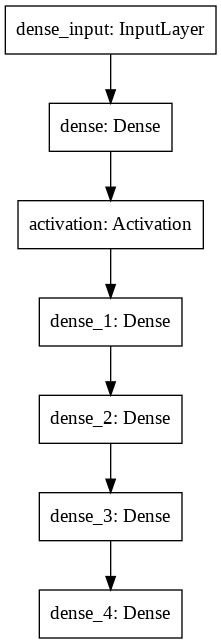

In [27]:
plot_model(model)

In [29]:
model.compile(loss = 'mse', 
             optimizer = Adam(learning_rate=0.02),
              metrics = ['mse'] )

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                140       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 315
Trainable params: 315
Non-trainable params: 0
__________________________________________________________

In [ ]:
history = model.fit(X_train, y_train, batch_size=50, epochs=100, validation_data=(X_test, y_test), verbose = 1)

In [36]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [38]:
result = model.evaluate(X_test, y_test)
print('loss', result[0])
print('mse', result[1])

4/4 [==============================] - 0s 3ms/step - loss: 82.6419 - mse: 82.6419
loss 82.6418685913086
mse 82.6418685913086


In [39]:
# 성능 개선을 위한 작업
# 1. 스케일링

# 2. 학습데이터를 학습, 검증 데이터로 나눈다.
# 3. 모델 생성시 activation = 'relu', 컴파일 optimizer = SGD
# 4. 학습, 결과 확인

In [64]:
(X_train_raw, y_train_raw), (X_test, y_test) = boston_housing.load_data()
X_train_raw.shape, y_train_raw.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [80]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train_raw)

In [81]:
X_test_scaler = scaler.fit_transform(X_test)

In [82]:
X_train, X_val, y_train, y_val = train_test_split(X_train_scaler, y_train_raw)

In [83]:
model = Sequential()

model.add(Dense(10, input_shape=(13,))) # 13은 features 수
model.add( Activation('sigmoid'))

model.add(Dense(8, activation='sigmoid'))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))

model.add(Dense(1)) # 값을 예측하는 것이기 때문에 1개의 출력값

In [84]:
model.compile(loss = 'mse', 
             optimizer = Adam(learning_rate=0.02),
              metrics = ['mae'] )

In [85]:
history = model.fit(X_train, y_train, batch_size=50, epochs=300, validation_data=(X_val, y_val), verbose = 1)

Epoch 1/300
7/7 [==============================] - 1s 33ms/step - loss: 602.6741 - mae: 22.6791 - val_loss: 641.3224 - val_mae: 23.4597
Epoch 2/300
7/7 [==============================] - 0s 10ms/step - loss: 564.9069 - mae: 21.9820 - val_loss: 616.2822 - val_mae: 22.9198
Epoch 3/300
7/7 [==============================] - 0s 12ms/step - loss: 540.4515 - mae: 21.2828 - val_loss: 593.3123 - val_mae: 22.4131
Epoch 4/300
7/7 [==============================] - 0s 9ms/step - loss: 527.2429 - mae: 20.9124 - val_loss: 571.5054 - val_mae: 21.9213
Epoch 5/300
7/7 [==============================] - 0s 10ms/step - loss: 495.3433 - mae: 20.1898 - val_loss: 551.1118 - val_mae: 21.4511
Epoch 6/300
7/7 [==============================] - 0s 9ms/step - loss: 474.6503 - mae: 19.7807 - val_loss: 531.7519 - val_mae: 20.9950
Epoch 7/300
7/7 [==============================] - 0s 10ms/step - loss: 466.1292 - mae: 19.6503 - val_loss: 513.2316 - val_mae: 20.5492
Epoch 8/300
7/7 [==============================] -

In [76]:
result = model.evaluate(X_test, y_test)
print('loss', result[0])
print('mse', result[1])

4/4 [==============================] - 0s 3ms/step - loss: 105.8569 - mae: 7.4558
loss 105.85693359375
mse 7.455821514129639
